In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\rajen\Downloads\archive (1)\Default_Fin.csv")

In [3]:
df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [4]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [5]:
df.shape


(10000, 5)

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
df.isna().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [8]:
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.rename({'Defaulted?':'Defaulted'}, axis = 1, inplace = True)
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [11]:
df.describe()

,Index,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,0.705600,10024.498524,402203.782224,0.033300
std,2886.89568,0.455795,5804.579486,160039.674988,0.179428
min,1.00000,0.000000,0.000000,9263.640000,0.000000
25%,2500.75000,0.000000,5780.790000,256085.520000,0.000000
50%,5000.50000,1.000000,9883.620000,414631.740000,0.000000
75%,7500.25000,1.000000,13995.660000,525692.760000,0.000000
max,10000.00000,1.000000,31851.840000,882650.760000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


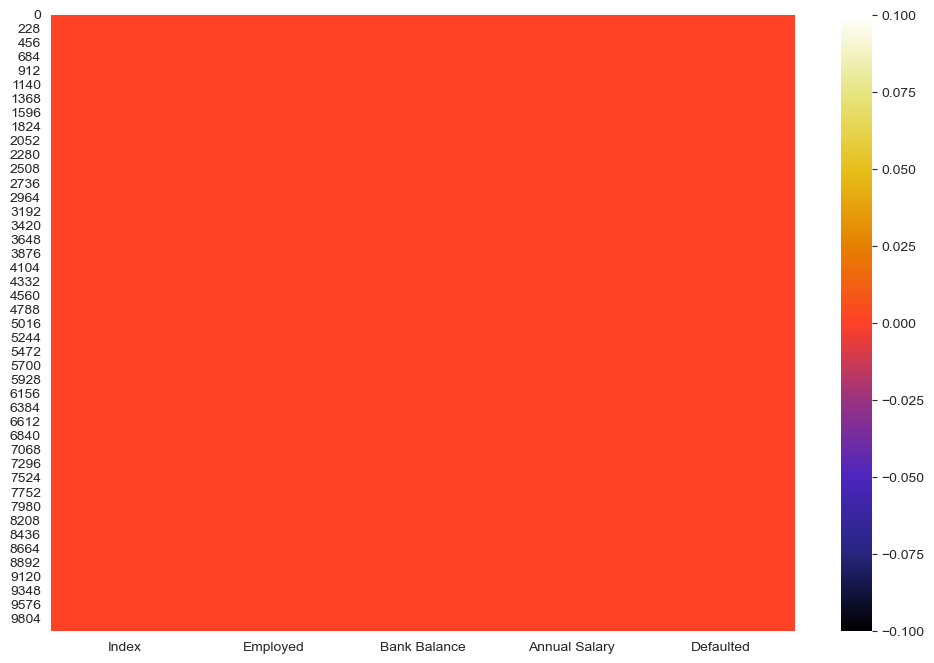

In [51]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.isnull(),cmap='CMRmap')
plt.show()

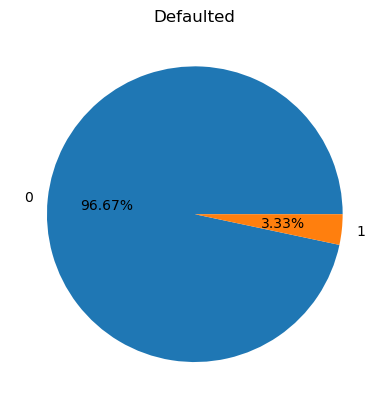

In [13]:
b=df.groupby("Defaulted")["Defaulted"].count()
plt.pie(b,labels=b.index,autopct="%.2f%%")
plt.title("Defaulted")
plt.show()

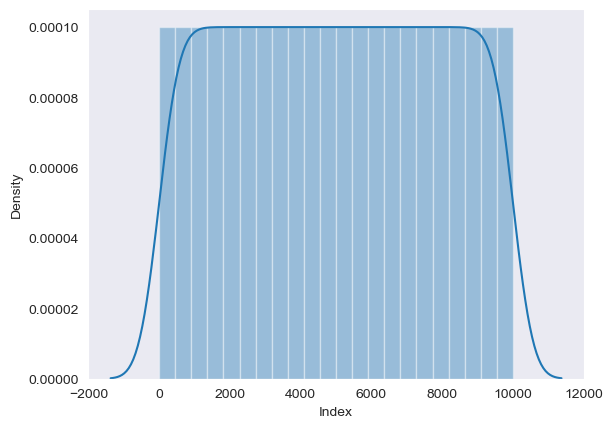

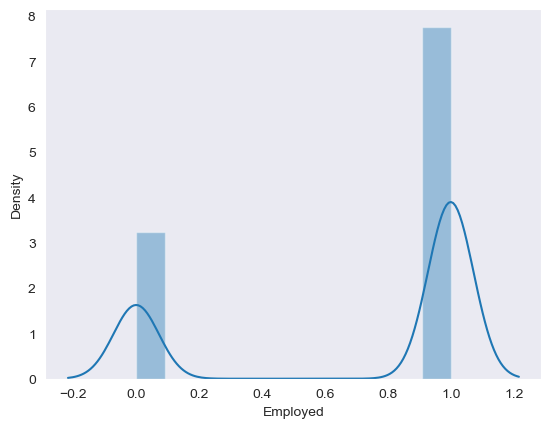

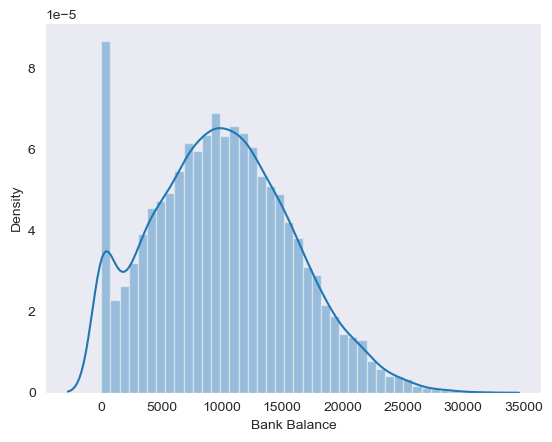

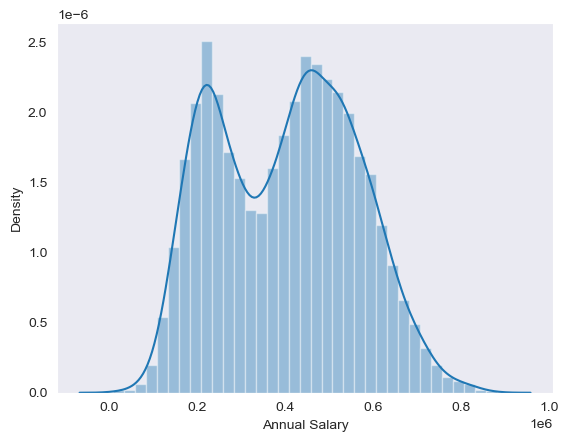

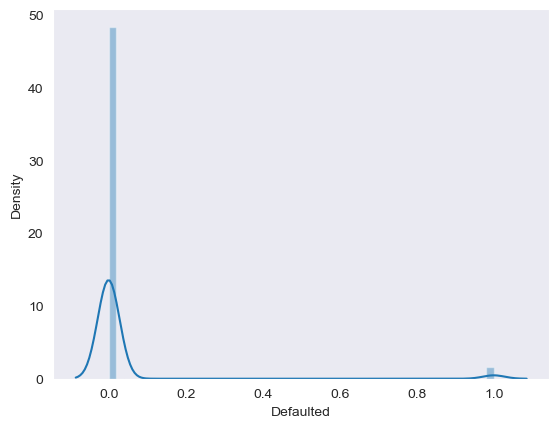

In [52]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

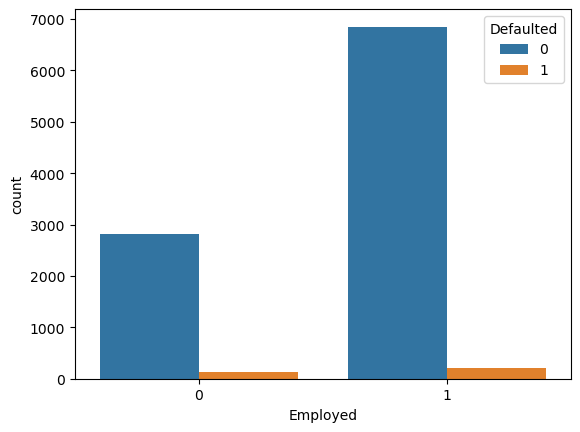

In [14]:
sns.countplot(x=df['Employed'],hue=df['Defaulted'])
plt.show

<Figure size 1000x800 with 0 Axes>

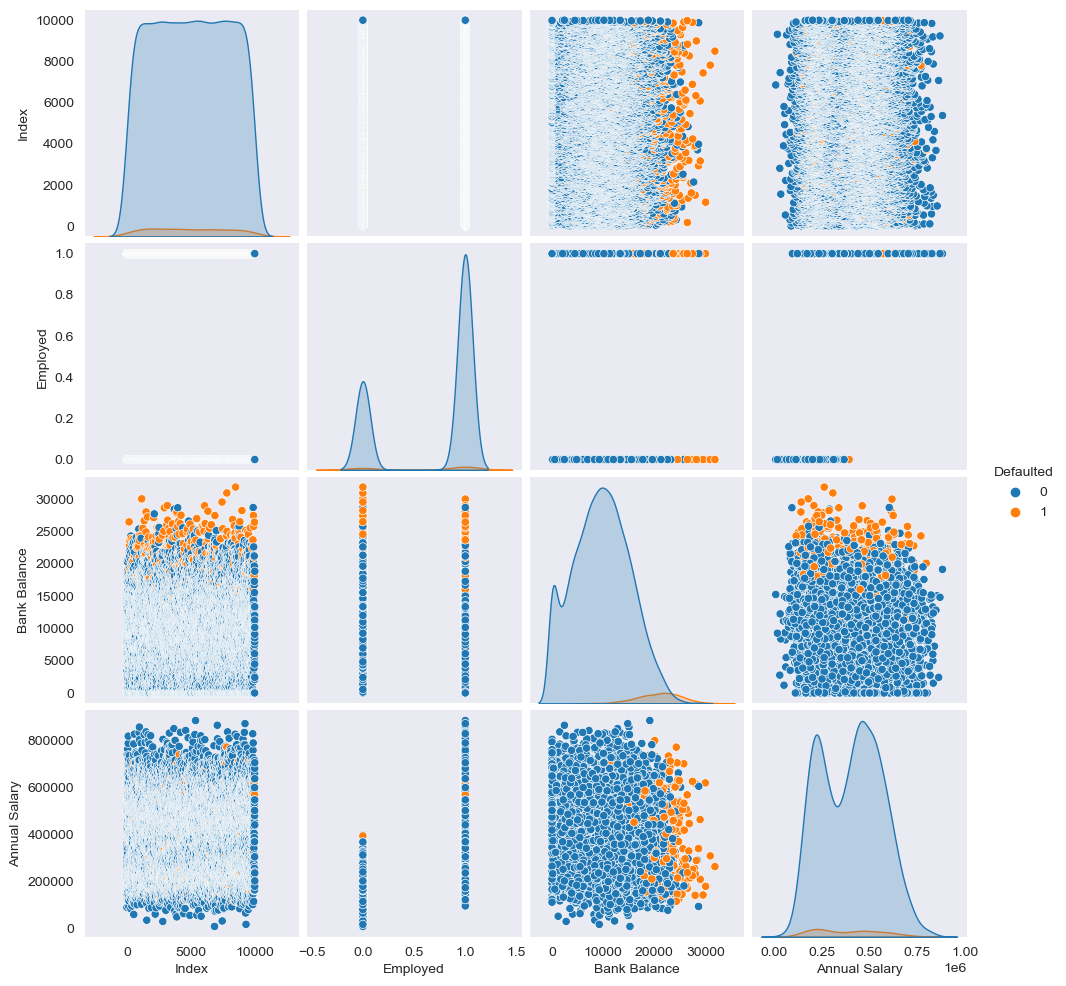

In [53]:
plt.figure(figsize=(10,8))
sns.pairplot(df,hue='Defaulted')
plt.show()

<Axes: >

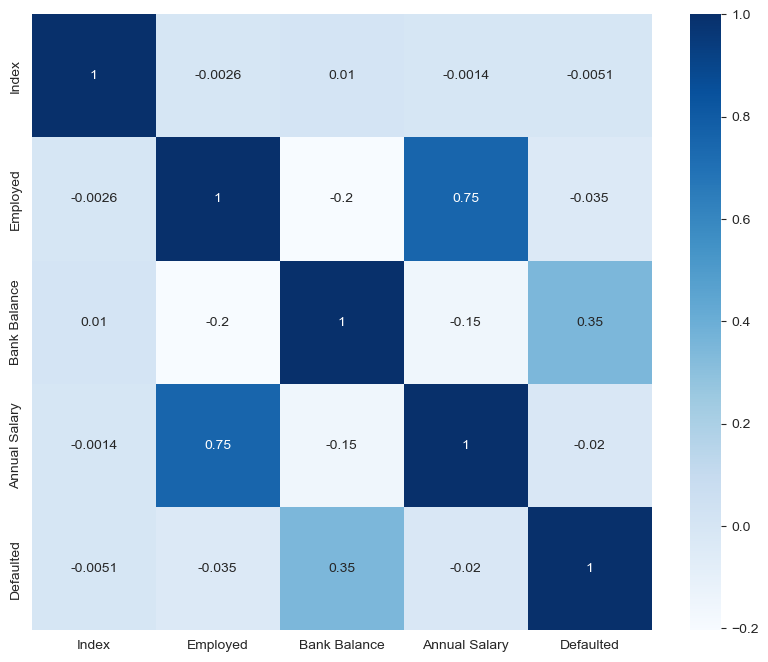

In [56]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

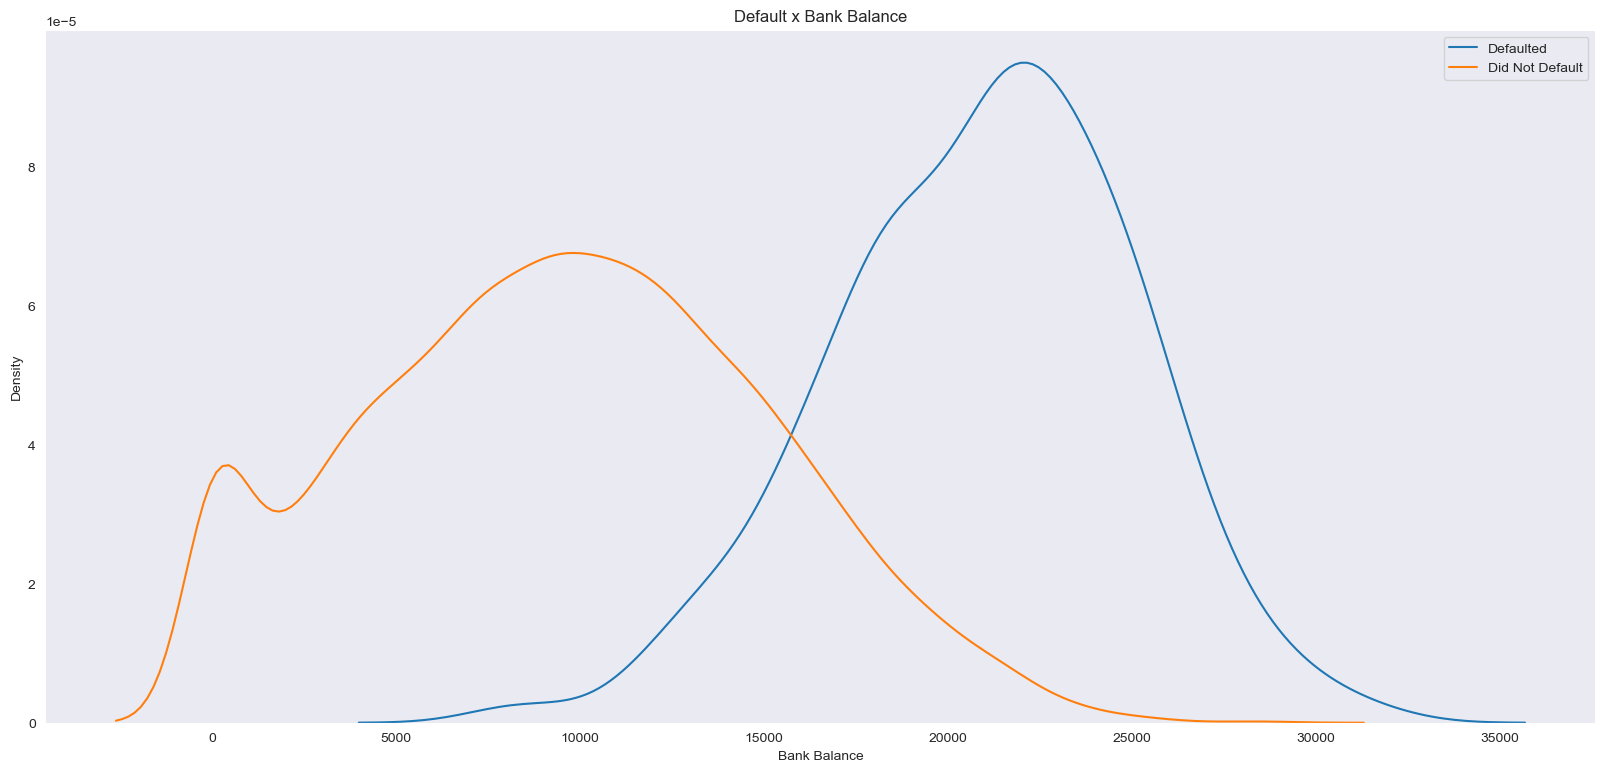

In [15]:
# Default distribution according to bank balance values
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Bank Balance'])
sns.kdeplot(df[df['Defaulted']==0]['Bank Balance'])
plt.title('Default x Bank Balance')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

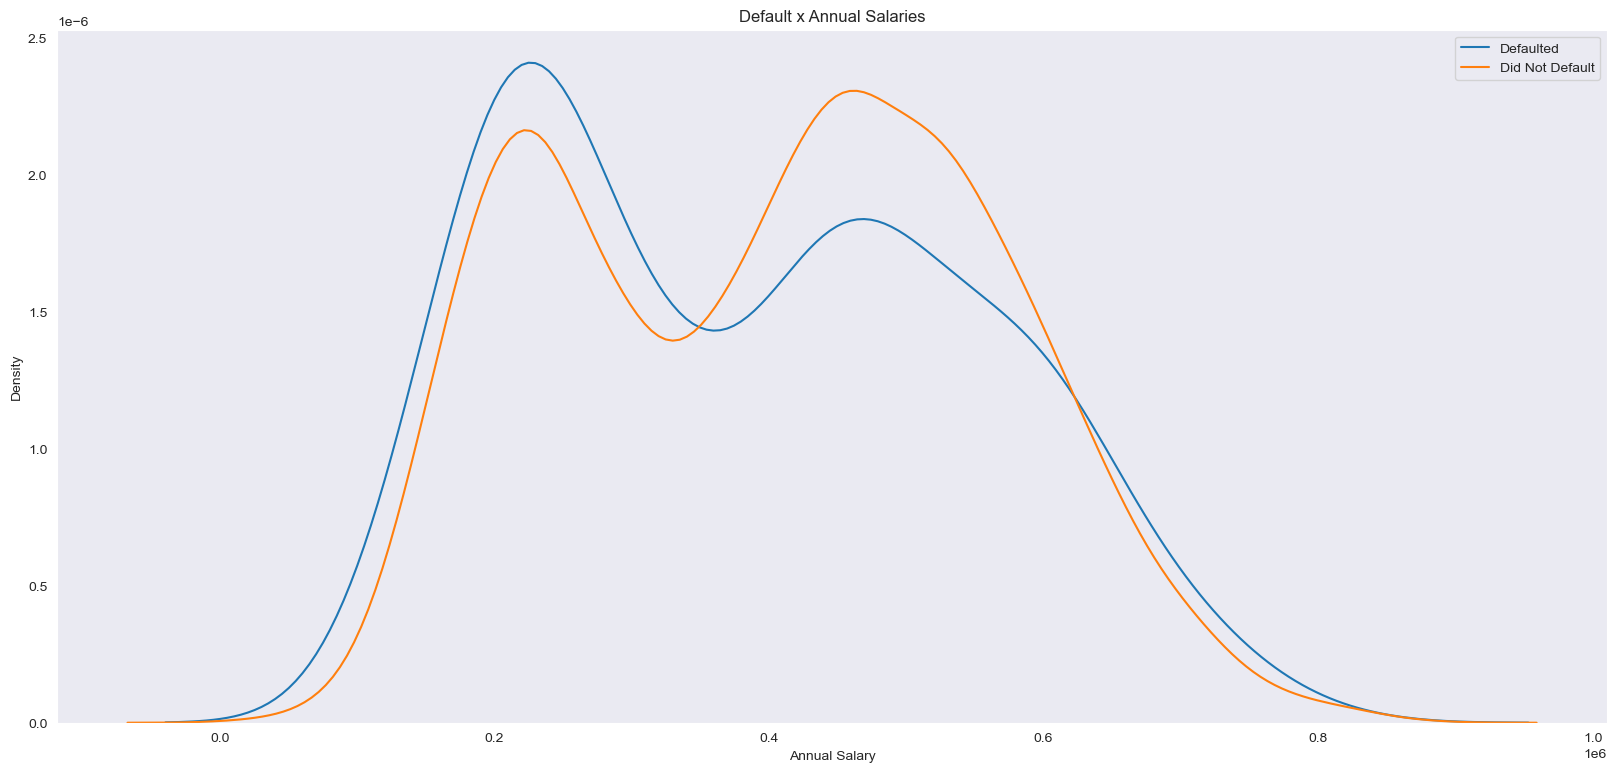

In [16]:
# Default distribution according to annual salaries
fig = plt.figure(figsize = (20, 9))
sns.set_style("dark")
sns.kdeplot(df[df['Defaulted']==1]['Annual Salary'])
sns.kdeplot(df[df['Defaulted']==0]['Annual Salary'])
plt.title('Default x Annual Salaries')
plt.legend(labels=['Defaulted', 'Did Not Default'])
plt.show()

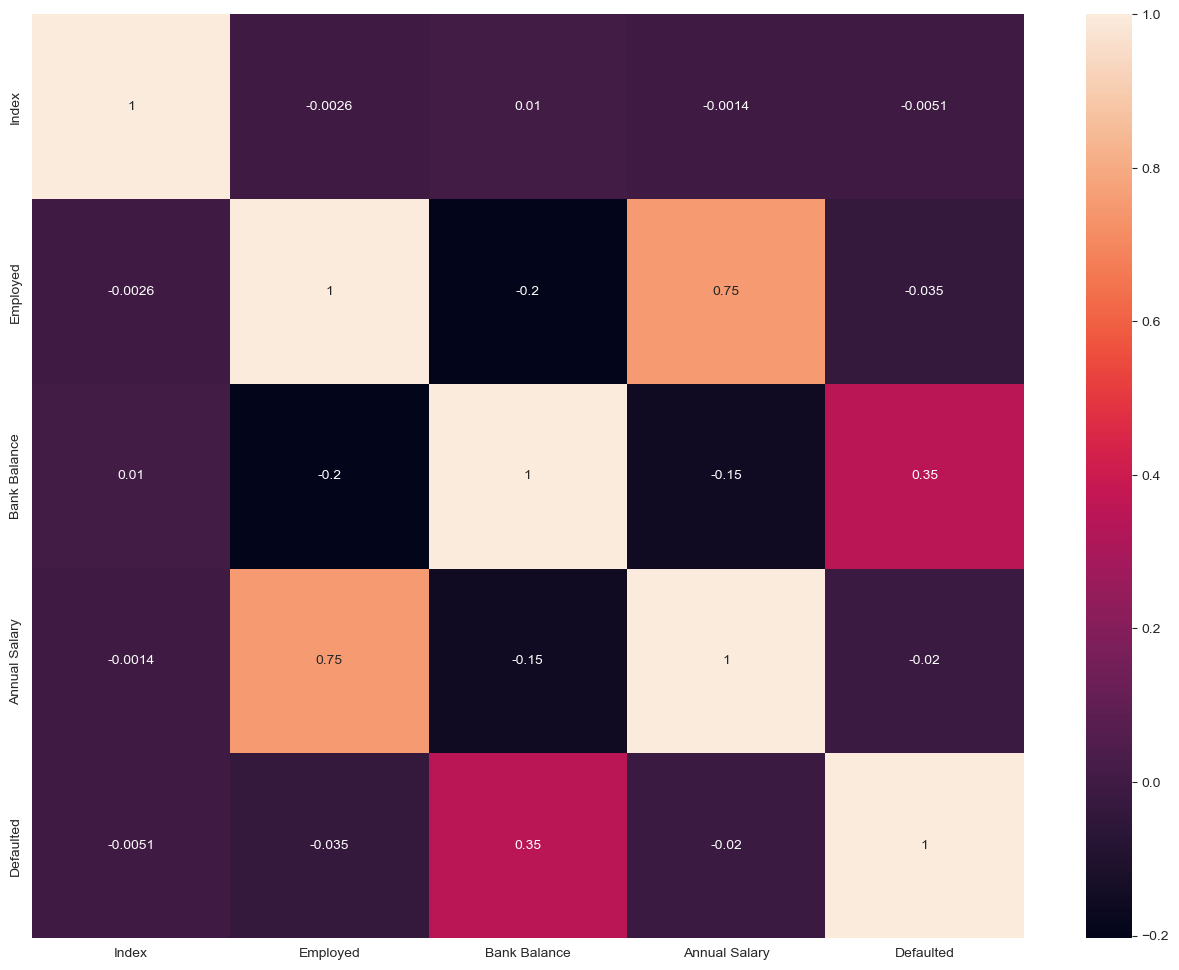

In [17]:
# Checking correlations
corr = df.corr()
plt.figure(figsize = (16, 12))
g = sns.heatmap(df.corr(), annot = True)



				  Bank Balance Frequency Plot 





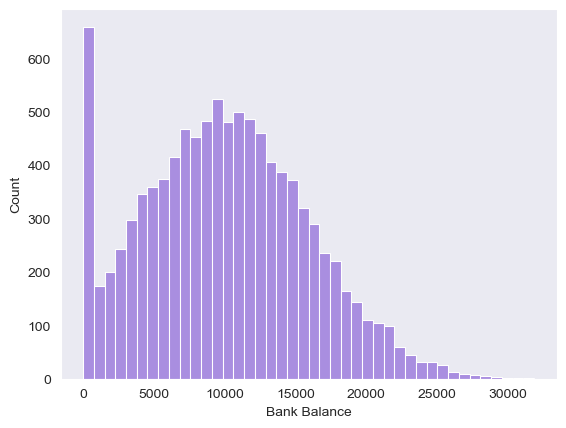

In [18]:
print('\n')
print('\t\t\t\t  Bank Balance Frequency Plot','\n\n\n')

g = sns.histplot(data = df, x = "Bank Balance", color = 'mediumpurple')

				  Annual Salary Frequency Plot 





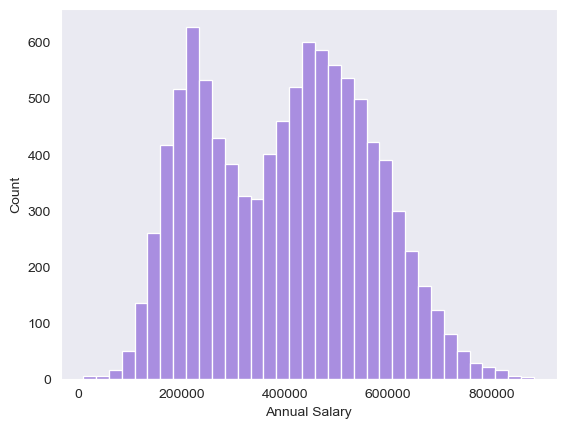

In [19]:

print('\t\t\t\t  Annual Salary Frequency Plot','\n\n\n')

g = sns.histplot(data = df, x = "Annual Salary", color = 'mediumpurple')

				  Annual Salary vs Bank Balance given Employment 





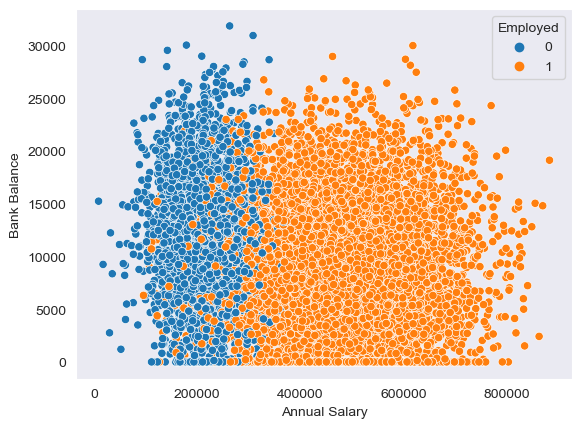

In [20]:

print('\t\t\t\t  Annual Salary vs Bank Balance given Employment','\n\n\n')

g = sns.scatterplot(data = df, x = "Annual Salary", y = "Bank Balance", hue = "Employed")

			 Annual Salary Frequency Plot -- No-Default vs Yes-Default 




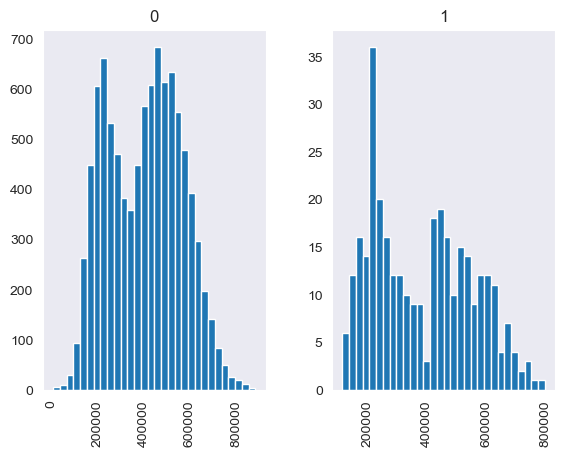

In [21]:
print('\t\t\t Annual Salary Frequency Plot -- No-Default vs Yes-Default','\n\n')

g = df['Annual Salary'].hist(by=df['Defaulted'], bins = 30)



			 Annual Salary for defaulters and non defaulters 





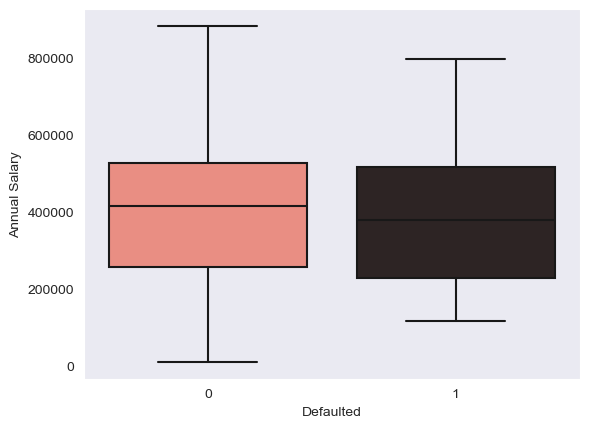

In [22]:
print('\n')
print('\t\t\t Annual Salary for defaulters and non defaulters','\n\n\n')

g = sns.boxplot(data = df, x = "Defaulted", y = "Annual Salary", palette = 'dark:salmon_r')

			 Bank Balance Frequency Plot -- Employed vs Unemplyed 




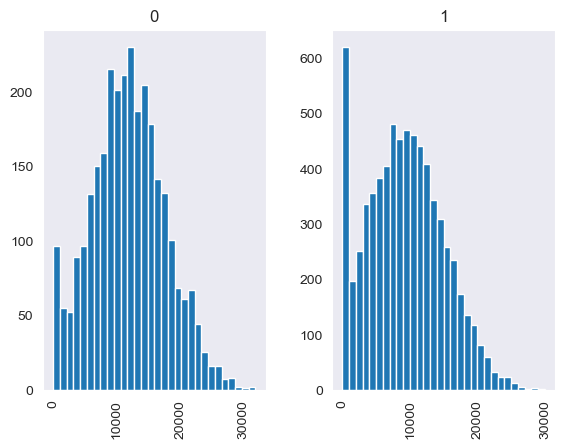

In [23]:
print('\t\t\t Bank Balance Frequency Plot -- Employed vs Unemplyed','\n\n')

g = df['Bank Balance'].hist(by=df['Employed'], bins = 30)



			 Bank Balance for the employed and the unemployed 





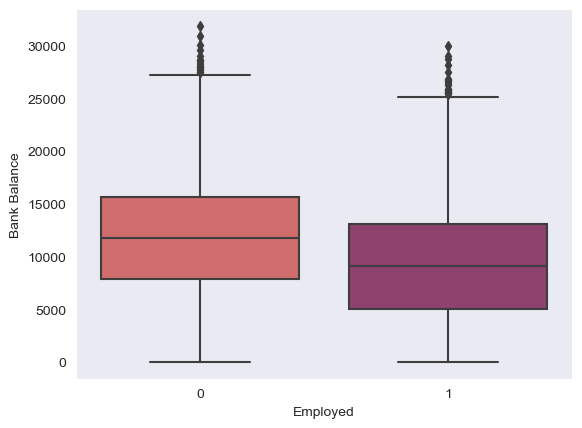

In [24]:
print('\n')
print('\t\t\t Bank Balance for the employed and the unemployed','\n\n\n')

g = sns.boxplot(data = df, x = "Employed", y = "Bank Balance", palette = 'flare')



				  Annual Salary vs Bank Balance given Default status 





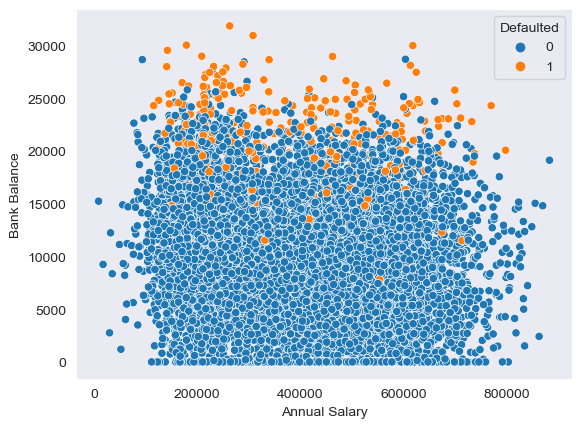

In [25]:
print('\n')
print('\t\t\t\t  Annual Salary vs Bank Balance given Default status','\n\n\n')

g = sns.scatterplot(data = df, x = "Annual Salary", y = "Bank Balance", hue = "Defaulted")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [28]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [29]:
X= df.drop('Defaulted',axis = 1)
Y = df['Defaulted']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 20)


In [30]:
log=LogisticRegression()

In [31]:
log.fit(X_train,Y_train)

LogisticRegression()

In [32]:
print('Train Score: ', log.score(X_train,Y_train))

Train Score:  0.964


In [33]:
print('Test Score: ',log.score(X_test,Y_test))

Test Score:  0.9665


In [34]:
pred_train = log.predict(X_train)
pred_test = log.predict(X_test)

In [35]:
print(metrics.classification_report(Y_train, pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7732
           1       0.05      0.00      0.01       268

    accuracy                           0.96      8000
   macro avg       0.51      0.50      0.49      8000
weighted avg       0.94      0.96      0.95      8000



In [36]:
print(metrics.classification_report(Y_test, pred_test))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1935
           1       0.33      0.03      0.06        65

    accuracy                           0.97      2000
   macro avg       0.65      0.51      0.52      2000
weighted avg       0.95      0.97      0.95      2000



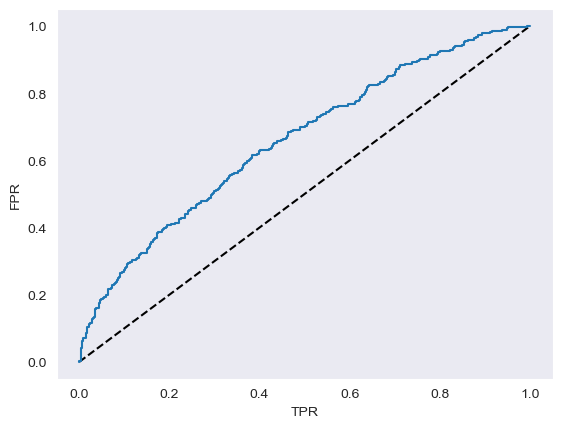

In [49]:
roc = log.predict_proba(X_train)[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_train, roc)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='logistic')
plt.ylabel("FPR")
plt.xlabel('TPR')
plt.show()


In [38]:
metrics.roc_auc_score(Y_train, roc)

0.6581829921782706

In [39]:
from sklearn.metrics import matthews_corrcoef

mcc=matthews_corrcoef(Y_test, pred_test)
print('MCC: ', mcc)

MCC:  0.09306188321265792


In [40]:
param_grid = {
    'penalty':['l1','l2'],
    'C' : [0.1,0.5,1,5,10]
}

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
grid = GridSearchCV(estimator=log, param_grid =param_grid, cv =5)

In [43]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [44]:
best_param = grid.best_params_
best_model = grid.best_estimator_

In [45]:
Y_pred = best_model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [47]:
acc = accuracy_score(Y_test,Y_pred)
pre = precision_score(Y_test,Y_pred)
rec = recall_score(Y_test,Y_pred)
f1 =  f1_score(Y_test,Y_pred)
roc_auc = roc_auc_score(Y_test,Y_pred)

In [48]:
print('Best Param',best_param)
print('Accuracy',acc)
print('Precision',pre)
print('Recall Score',rec)
print('F1 Score',f1)
print('AUC-ROC',roc_auc)

Best Param {'C': 0.1, 'penalty': 'l2'}
Accuracy 0.9665
Precision 0.3333333333333333
Recall Score 0.03076923076923077
F1 Score 0.056338028169014086
AUC-ROC 0.5143510236533492
